In [1]:

import os 
import numpy as np
import argparse
import json
from PIL import Image
import torch
import random

from models.p2p_editor import P2PEditor

torch.cuda.set_device(3)

def mask_decode(encoded_mask,image_shape=[512,512]):
    length=image_shape[0]*image_shape[1]
    mask_array=np.zeros((length,))
    
    for i in range(0,len(encoded_mask),2):
        splice_len=min(encoded_mask[i+1],length-encoded_mask[i])
        for j in range(splice_len):
            mask_array[encoded_mask[i]+j]=1
            
    mask_array=mask_array.reshape(image_shape[0], image_shape[1])
    # to avoid annotation errors in boundary
    mask_array[0,:]=1
    mask_array[-1,:]=1
    mask_array[:,0]=1
    mask_array[:,-1]=1
            
    return mask_array


def setup_seed(seed=1234):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


In [2]:
p2p_editor=P2PEditor(["null-text-inversion+p2p","directinversion+p2p"], torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu') )

safety_checker/pytorch_model.fp16.safetensors not found


Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
/home/juxuan/anaconda3/envs/p2p/lib/python3.9/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:101: FutureWarning: The configuration file of this scheduler: DDIMSchedulerDev {
  "_class_name": "DDIMSchedulerDev",
  "_diffusers_version": "0.10.0",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "num_train_timesteps":

null-text-inversion+p2p


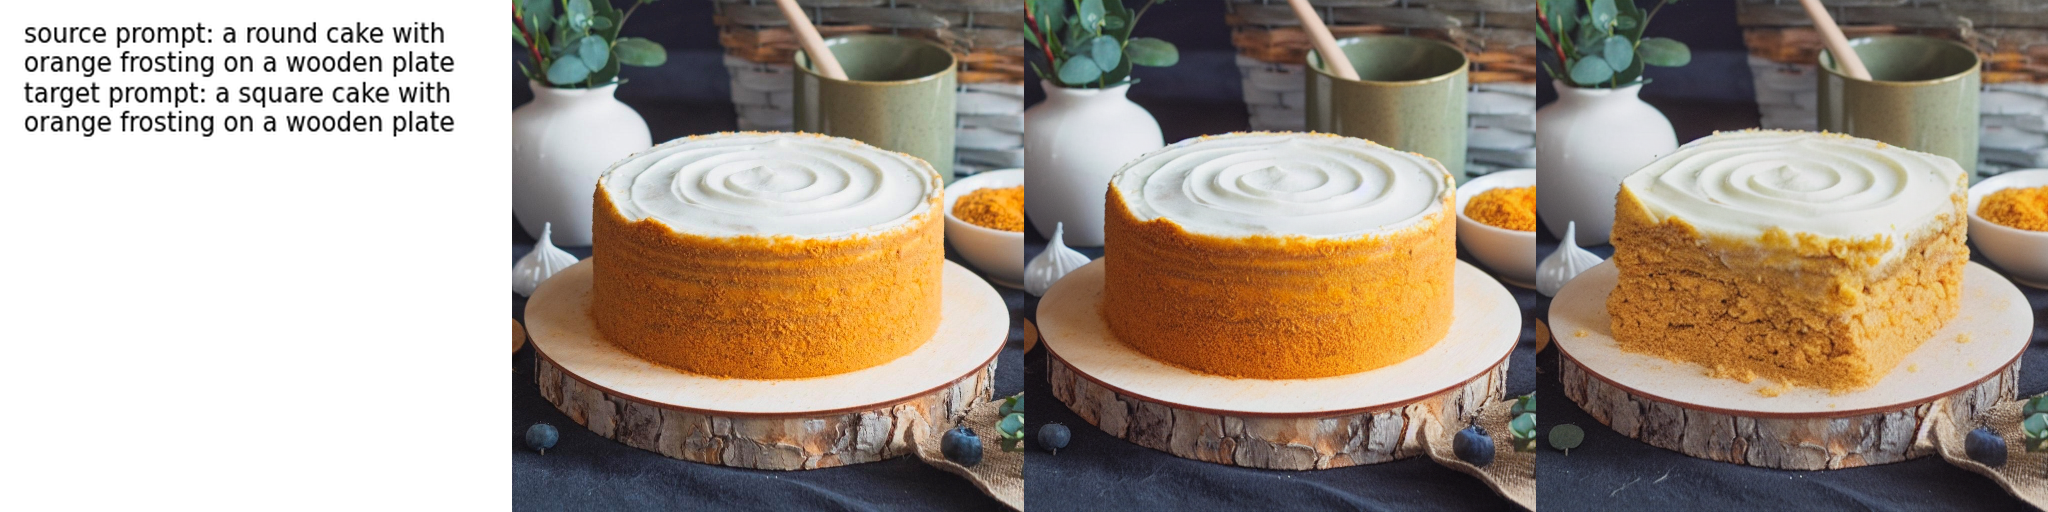

In [3]:
# null-text-inversion+p2p

edited_image = p2p_editor("null-text-inversion+p2p",
                    image_path="scripts/example_cake.jpg",
                    prompt_src="a round cake with orange frosting on a wooden plate",
                    prompt_tar="a square cake with orange frosting on a wooden plate",
                    guidance_scale=7.5,
                    cross_replace_steps=0.4,
                    self_replace_steps=0.6,
                    blend_word=((("cake", ),
                                ("cake", ))),
                    eq_params={
                        "words": ("cake", ),
                        "values": (2, )
                    },
                    proximal="l0",
                    quantile=0.75,
                    use_inversion_guidance=True,
                    recon_lr=1,
                    recon_t=400,
                    )

print("null-text-inversion+p2p")
display(edited_image)

ours+p2p


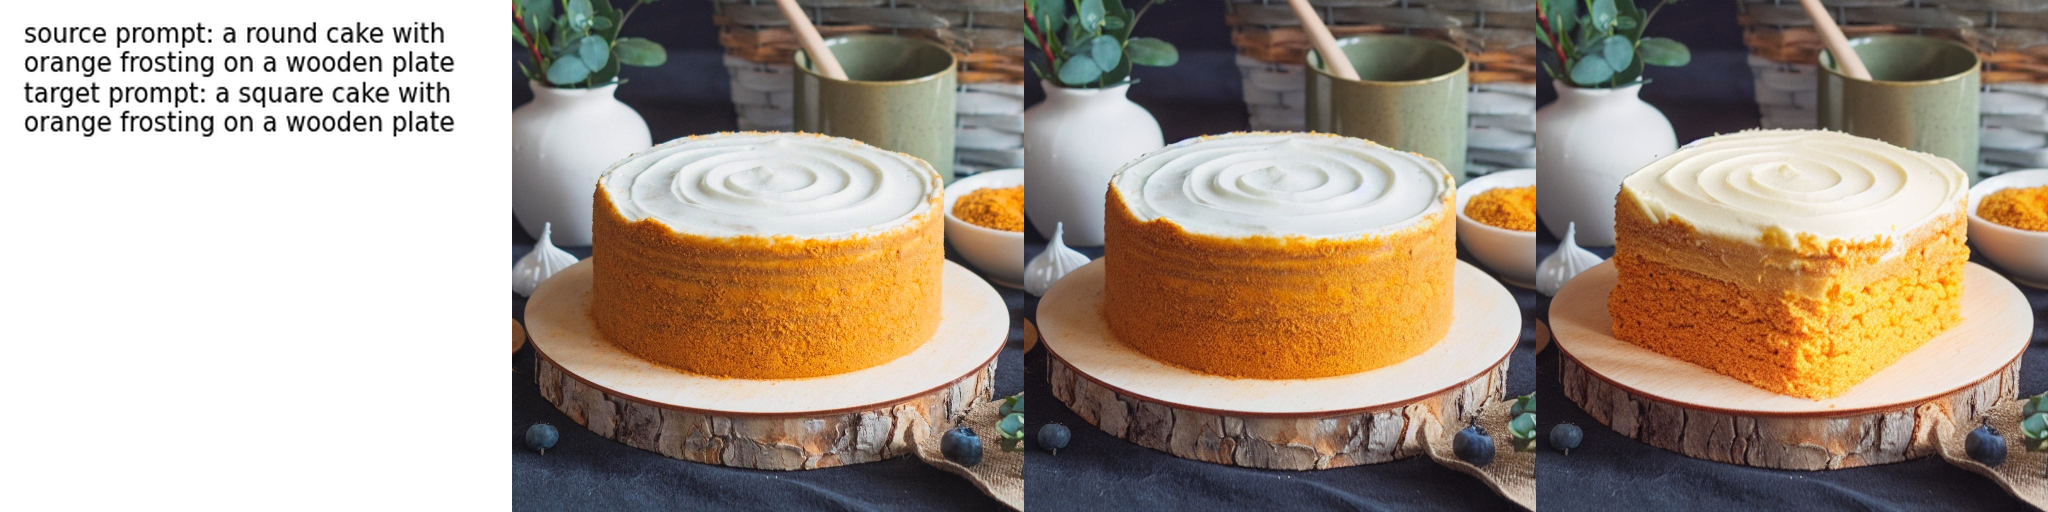

In [4]:
# directinversion(ours)+p2p

edited_image = p2p_editor("directinversion+p2p",
                    image_path="scripts/example_cake.jpg",
                    prompt_src="a round cake with orange frosting on a wooden plate",
                    prompt_tar="a square cake with orange frosting on a wooden plate",
                    guidance_scale=7.5,
                    cross_replace_steps=0.4,
                    self_replace_steps=0.6,
                    blend_word=((("cake", ),
                                ("cake", ))),
                    eq_params={
                        "words": ("cake", ),
                        "values": (2, )
                    },
                    proximal="l0",
                    quantile=0.75,
                    use_inversion_guidance=True,
                    recon_lr=1,
                    recon_t=400,
                    )

print("directinversion(ours)+p2p")
display(edited_image)

null-text-inversion+p2p


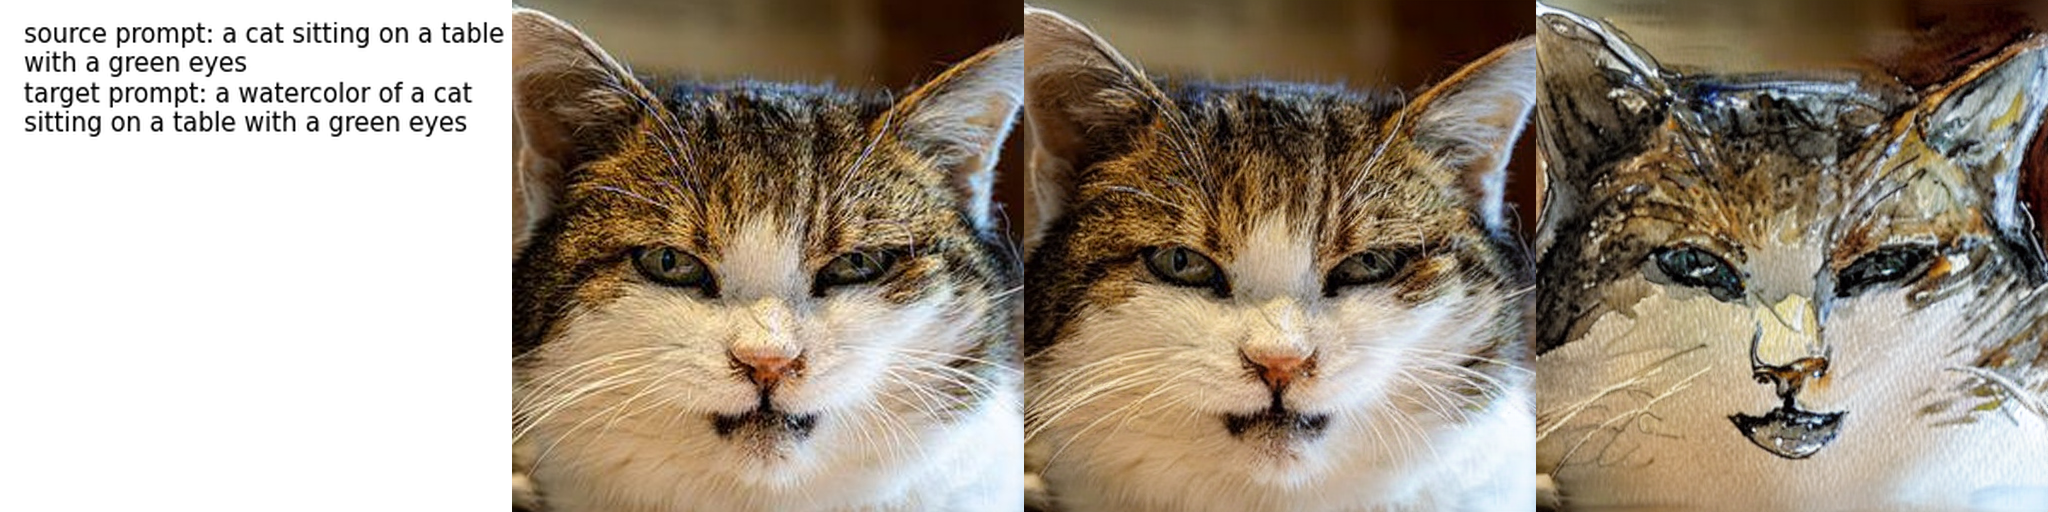

In [5]:
# null-text-inversion+p2p

edited_image = p2p_editor("null-text-inversion+p2p",
                    image_path="scripts/example_cat.jpg",
                    prompt_src="a cat sitting on a table with a green eyes",
                    prompt_tar="a watercolor of a cat sitting on a table with a green eyes",
                    guidance_scale=7.5,
                    cross_replace_steps=0.4,
                    self_replace_steps=0.6,
                    blend_word=((("cat", ),
                                ("cat", ))),
                    eq_params={
                        "words": ("watercolor", ),
                        "values": (5, )
                    },
                    proximal="l0",
                    quantile=0.75,
                    use_inversion_guidance=True,
                    recon_lr=1,
                    recon_t=400,
                    )

print("null-text-inversion+p2p")
display(edited_image)

ours+p2p


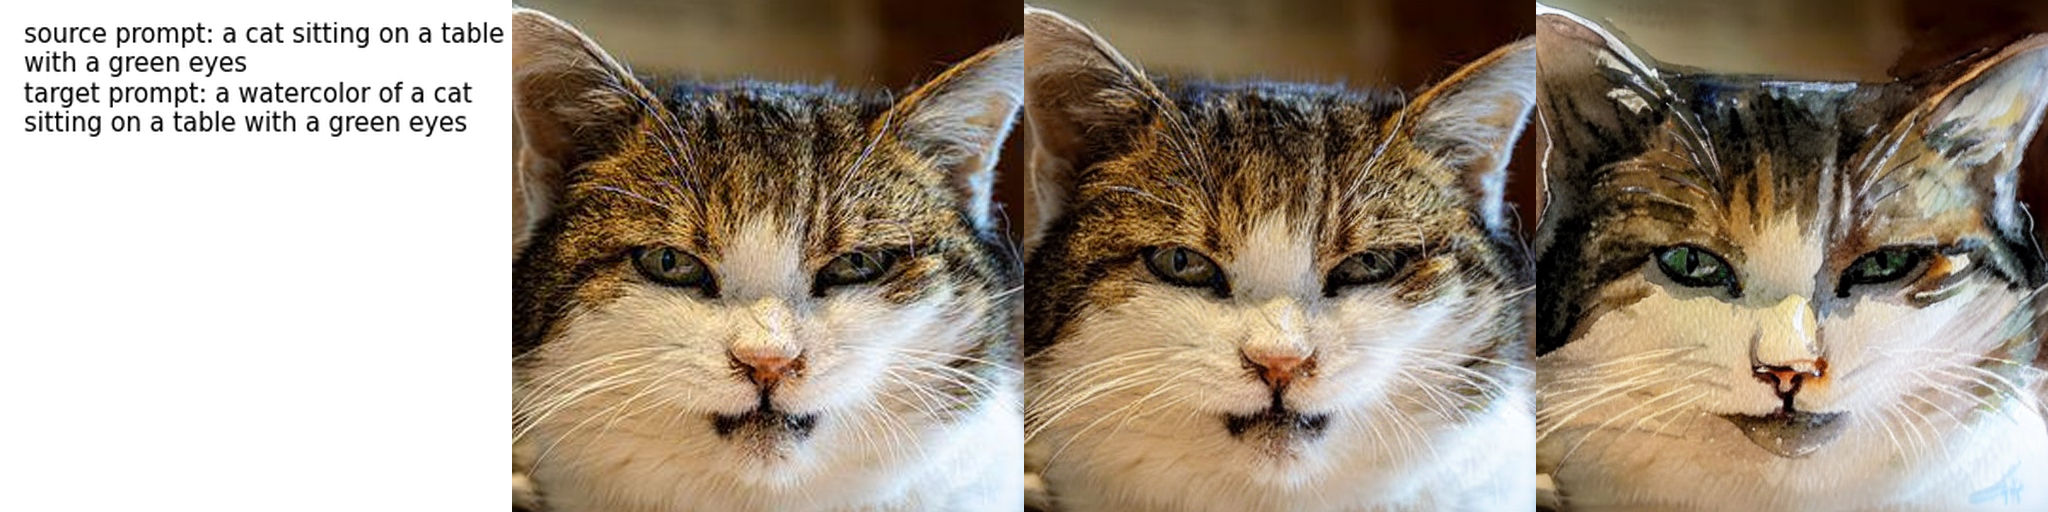

In [6]:
# directinversion+p2p

edited_image = p2p_editor("directinversion+p2p",
                    image_path="scripts/example_cat.jpg",
                    prompt_src="a cat sitting on a table with a green eyes",
                    prompt_tar="a watercolor of a cat sitting on a table with a green eyes",
                    guidance_scale=7.5,
                    cross_replace_steps=0.4,
                    self_replace_steps=0.6,
                    blend_word=((("cat", ),
                                ("cat", ))),
                    eq_params={
                        "words": ("watercolor", ),
                        "values": (5, )
                    },
                    proximal="l0",
                    quantile=0.75,
                    use_inversion_guidance=True,
                    recon_lr=1,
                    recon_t=400,
                    )

print("directinversion(ours)+p2p")
display(edited_image)